In [23]:
from pandas_datareader import data, wb

In [25]:
tickers_data = {}

In [26]:
from tqdm import tqdm

tickers = ['APBR', 'PAMP', 'YPFD', 'GGAL', 'ERAR', 'CRES', 'COME', 'ALUA', 'FRAN', 'MIRG',
'BMA', 'TRAN', 'TS', 'JMIN', 'EDN', 'TGSU2', 'SAMI', 'AGRO', 'TECO2', 'PESA',
'CEPU', 'CTIO', 'CECO2', 'AUSO', 'PETR', 'CELU', 'TGNO4']


for ticker in tqdm(tickers):
    if ticker in tickers_data: continue
        
    for method in 'get_data_google get_data_yahoo'.split():
        try:
            tickers_data[ticker] = {
                'source': method,
                'data': getattr(data, method)(ticker)
            }
        except Exception:
            continue


100%|██████████| 27/27 [02:00<00:00,  4.05s/it]


In [32]:
df = tickers_data.values()[0]['data']

In [35]:
import pickle
with open('tickers_data.pkl', 'w') as f:
    pickle.dump(tickers_data, f, 2)

In [36]:
%matplotlib nbagg

%pylab

In [189]:
returns = []
for ticker, ticker_data in tickers_data.iteritems():
    close = ticker_data['data']['2017-01-01':].Close
    if len(close) == 0: continue
        
    returns.append(
        {
            'return': (close.iloc[-1] - close.iloc[0]) / close.iloc[0],
            'close': close,
            'ticker': ticker
        }    
    )


In [190]:
def corr(s1, s2, start):
    s1 = s1[start:]
    s2 = s2[start:]
    
    return (s1 / s1.iloc[0]).corr(s2 / s2.iloc[0])

corrs = []
for t1 in returns:
    for t2 in returns:
        corrs.append(
            {
                't1': t1['ticker'],
                't2': t2['ticker'],
                'corr': corr(t1['close'], t2['close'], '2016-01-01')
            }
        )

In [191]:
import pandas as pd
returns = pd.DataFrame(returns)
returns.sort_values('return', ascending=False)[['ticker', 'return']]

,ticker,return
8,TGNO4,0.786207
18,PESA,0.568966
3,PAMP,0.543103
24,AUSO,0.537234
10,GGAL,0.473628
23,TGSU2,0.444270
0,YPFD,0.366300
15,CECO2,0.263158
17,COME,0.254902
7,BMA,0.251392


In [192]:
corrs = pd.DataFrame(corrs)
corrs = corrs.sort_values('corr', ascending=False)
corrs[corrs.t1 == 'AUSO'].merge(returns, left_on='t2', right_on='ticker')[['t2', 'corr', 'return']]

,t2,corr,return
0,AUSO,1.000000,0.537234
1,TGNO4,0.929891,0.786207
2,GGAL,0.913985,0.473628
3,PAMP,0.891329,0.543103
4,TGSU2,0.890627,0.444270
5,PESA,0.889105,0.568966
6,BMA,0.819177,0.251392
7,CECO2,0.814445,0.263158
8,CRES,0.813062,0.161179
9,YPFD,0.798270,0.366300


<IPython.core.display.Javascript object>


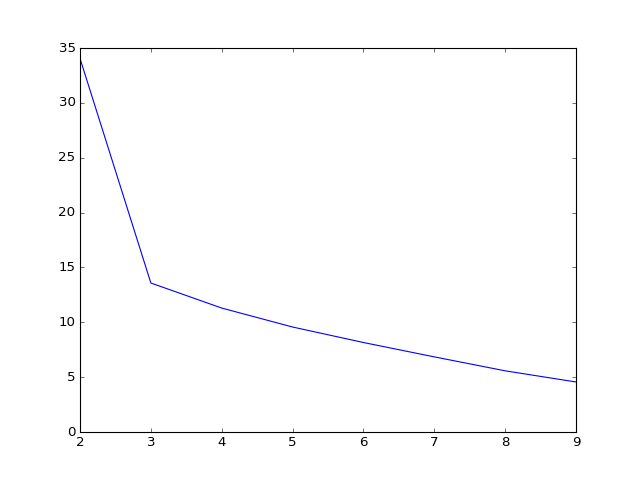

In [193]:
figure()
plot(range(2, 10), [k_means(M, i)[-1] for i in range(2, 10)])

In [205]:
from sklearn.cluster import k_means
clusters = dict(zip(names, k_means(M, 5)[1]))


In [206]:
from collections import defaultdict

names = sorted(corrs.t1.unique(), key=lambda x:corrs['corr'][corrs.t1==x].sum())

avg_cluster_distance = defaultdict(list)
for name, cl_id in clusters.iteritems():
    avg_cluster_distance[cl_id].append(corrs['corr'][corrs.t1==name].sum())
avg_cluster_distance = {cl_id: np.mean(v) for cl_id, v in avg_cluster_distance.iteritems()}

names = sorted(names, key=lambda x:avg_cluster_distance[clusters[x]])
M = []

for name1 in names:
    row = []
    for name2 in names:
        c = corrs[(corrs.t1 == name1) & (corrs.t2==name2)]
        row.append(c['corr'].iloc[0])
    M.append(row)
    

<IPython.core.display.Javascript object>


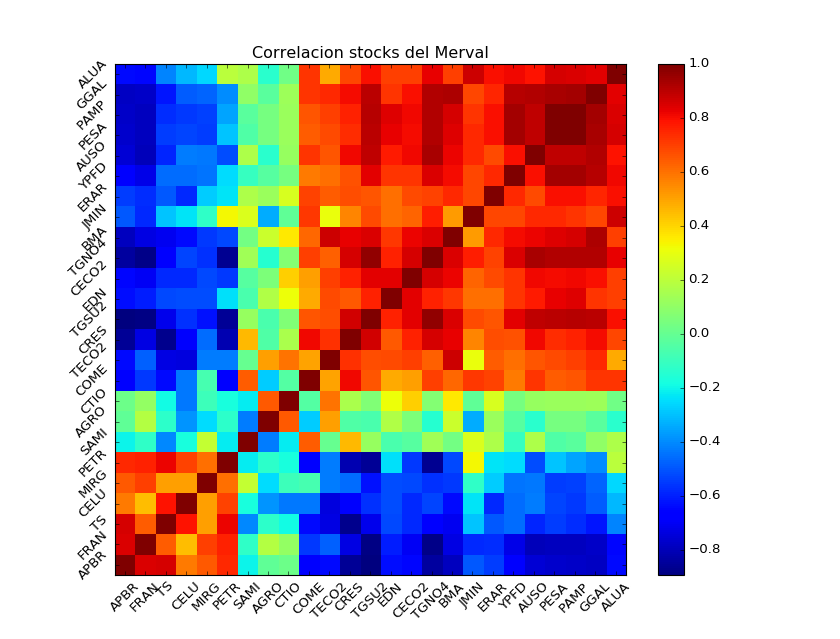

In [207]:
figure()
imshow(M, interpolation='nearest', origin='lower')
xticks(range(len(names)), names, rotation=45)
yticks(range(len(names)), names, rotation=45)

colorbar()
title('Correlacion stocks del Merval')

In [109]:
import networkx as nx
edges = []

for i, row in corrs.iterrows():
    if row['corr'] > 0:
        edges.append((row.t1, row.t2, round(float(row['corr']), 2)))
        
g = nx.Graph()
g.add_weighted_edges_from(edges)

In [110]:
nx.write_graphml(g, 'g.graphml')

In [95]:
!pwd

/Users/przivic/prog


<IPython.core.display.Javascript object>


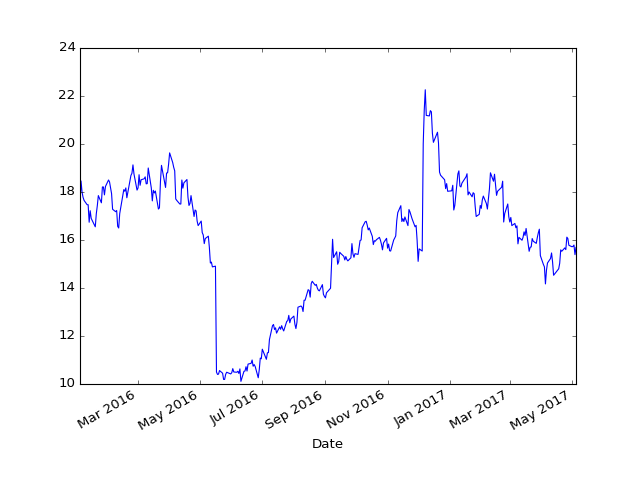

In [114]:
figure()
tickers_data['FRAN']['data']['2016-01-01':].Close.plot()